# STOR 120 Take Home Midterm 2

Due: Wednesday, October 18th, at 10:10am

Directions: The exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question.

**Check your file on Gradescope to ensure that it is the file that you intended to submit!**

## New York City Yellow Taxi Cabs

Taxicabs are the only vehicles that have the right to pick up street-hailing and prearranged passengers anywhere in New York City. Taxis painted yellow (medallion taxis) are able to pick up passengers anywhere in the five boroughs. By law, there are 13,587 taxis in New York City and each taxi must have a medallion affixed to it. Medallions are auctioned by the City and are transferrable on the open market by licensed brokers. The `TaxiNYC` table contains data from a random sample of taxi rides, with the variables listed below:

Variable               | Description
-----------------------|------------------------------------------------------------------------------
trip_duration          | Length in seconds of the taxi ride
distance_traveled      | Length in kilometers of the taxi ride
num_of_passengers      | number of passengers in the taxi ride
fare                   | base cost in dollars of the taxi ride, not including tip or other fees
tip                    | tip in dollars of the taxi ride.
miscellaneous_fees     | additional cost in dollars of fees in addition to the fare and tip
total_fare             | total cost of the taxi ride, including fare, tip, and miscellaneous fees
surge_applied          | 1 = additional charges were applied due to taxi ride during rush hour or to and from specific locations. 0 = no additional charges due to surge pricing


In [73]:
# Run this cell to set up your notebook

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

TaxiNYC = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/master/data/TaxiNYC_120.csv')
TaxiNYC.show(3)

trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
509,3.99,1,8.78,1.04,3.49,13.31,1
1409,5.13,1,16.09,3.9,3.47,23.46,1
752,2.17,1,9.26,0,0.78,10.04,0


**Question 1.** Construct a new table named `TaxiNYC1` that contains all of the columns and rows of the `TaxiNYC` table, as well as an additional column `Nonzero_tip` which is equal to the int `1` for taxi rides with a tip above 0 dollars and the int `0` for taxi rides with no tip (a tip of 0 dollars).

In [74]:
TaxiNYC1 = TaxiNYC.with_column(
    'Nonzero_tip',
    (TaxiNYC.column('tip') > 0)*1
)

TaxiNYC1

trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,Nonzero_tip
509,3.99,1,8.78,1.04,3.49,13.31,1,1
1409,5.13,1,16.09,3.9,3.47,23.46,1,1
752,2.17,1,9.26,0,0.78,10.04,0,0
135,0.77,1,3.9,0,1.27,5.17,0,0
1737,9.38,1,23.4,5.46,3.96,32.82,1,1
1752,9.7,1,23.4,2.86,4.5,30.76,1,1
1205,11.86,1,21.45,0,1.27,22.72,0,0
39,0.23,1,2.44,0,1.27,3.71,0,0
657,2.83,1,9.26,2.47,0.83,12.56,0,1
1117,4.14,1,12.68,0,0.78,13.46,0,0


**Question 2.** Construct a new table named `TaxiNYC2` that contains all of the columns and rows of the `TaxiNYC1` table, as well as an additional column `tip_percentage`, which is equal to the *percentage* of the `fare` left as a tip for each taxi ride. The values in this column should be `float` values. 

*Note:* If a 15.4% tip is left for a given taxi ride, then the value for this taxi ride in this column should be 15.4

In [75]:
TaxiNYC2 = TaxiNYC1.with_column(
    'tip_percentage',
    TaxiNYC.column('tip') / TaxiNYC.column('fare') *100
)

TaxiNYC2

trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,Nonzero_tip,tip_percentage
509,3.99,1,8.78,1.04,3.49,13.31,1,1,11.8451
1409,5.13,1,16.09,3.9,3.47,23.46,1,1,24.2387
752,2.17,1,9.26,0,0.78,10.04,0,0,0
135,0.77,1,3.9,0,1.27,5.17,0,0,0
1737,9.38,1,23.4,5.46,3.96,32.82,1,1,23.3333
1752,9.7,1,23.4,2.86,4.5,30.76,1,1,12.2222
1205,11.86,1,21.45,0,1.27,22.72,0,0,0
39,0.23,1,2.44,0,1.27,3.71,0,0,0
657,2.83,1,9.26,2.47,0.83,12.56,0,1,26.6739
1117,4.14,1,12.68,0,0.78,13.46,0,0,0


**Question 3.1.** Suppose that you were to randomly choose three taxi rides from  `TaxiNYC2`, such that it is *not* possible to choose the same ride more than once. What is the probability that all of these randomly chosen rides will each have two or fewer passengers? Assign this probability to `q31_prob`.

*Note:* You should calculate this exact theoretical probability and not determine the answer by running a simulation.

In [76]:
num_few_pass = TaxiNYC2.where('num_of_passengers', are.below_or_equal_to(2)).num_rows
q31_prob = (num_few_pass / TaxiNYC2.num_rows) * (num_few_pass / (TaxiNYC2.num_rows -1)) * (num_few_pass / (TaxiNYC2.num_rows -2))
q31_prob

0.7820138862087502

**Question 3.2.** Suppose that you were to randomly choose 10 taxi rides from `TaxiNYC2`, such that it is possible to choose the same ride more than once. What is the probability that at least one of the ten randomly chosen rides has no tip left?  Assign this probability to `q32_prob`.

*Note:* You should calculate this exact theoretical probability and not determine the answer by running a simulation.

In [77]:
num_tip = TaxiNYC2.where('Nonzero_tip', 1).num_rows
q32_prob = 1 - (num_tip / TaxiNYC2.num_rows) ** 10
q32_prob

0.9974022740598893

**Question 3.3.** Of the taxi rides from `TaxiNYC2` with only one passenger, suppose that you randomly choose five taxi rides, such that it is possible to choose the same ride more than once. What is the probability that for all five rides the fares were either 10 or more dollars in fare with at least a 10% tip percentage, or between 5-10 dollars in fare (not including 10 dollars), with at least a 15% tip percentage?  Assign this probability to `q33_prob`.

*Note:* You should calculate this exact theoretical probability and not determine the answer by running a simulation.

In [78]:
one_pass = TaxiNYC2.where('num_of_passengers', 1)
one_tens = one_pass.where('fare', are.above_or_equal_to(10)).where('tip_percentage', are.above_or_equal_to(10.0))
one_fifteens = one_pass.where('fare', are.between(5, 10)).where('tip_percentage', are.above_or_equal_to(15.0))
q33_prob = (one_tens.num_rows / one_pass.num_rows) + (one_fifteens.num_rows / one_pass.num_rows)
q33_prob 

0.4949640287769784

**Question 4.1** Write a function named `q33_simulation`, with one argument, `sample_size`. The function should take a sample from the `TaxiNYC2` of size `sample_size`, only sampling from those taxi rides with only one passenger, such that it is possible to choose the same ride more than once. The function should return an array of two values. The first value should be the number (int or float) of taxi rides in the sample where the fare was 10 dollars or more with at least a 10% tip percentage. The second value should be the number of taxi rides in the sample where the fare was between 5-10 dollars (not including 10 dollars), with at least a 15% tip percentage. 

In [79]:
def q33_simulation(sample_size):
    one_sample = one_pass.sample(sample_size)
    num_one_tens = one_sample.where(
        'fare', are.above_or_equal_to(10)).where(
        'tip_percentage', are.above_or_equal_to(10.0)).num_rows
    num_one_fifteens = one_sample.where(
        'fare', are.between(5, 10)).where(
        'tip_percentage', are.above_or_equal_to(15.0)).num_rows
    
    return make_array(num_one_tens, num_one_fifteens)
    

In [80]:
# Run this cell  
q33_simulation(1000)

array([295, 215], dtype=int64)

**Question 4.2** Use the function written in question 4.1 to perform a simulation. You should take 2000 samples of `TaxiNYC2` of size five, only sampling from those taxi rides with only one passenger, such that it is possible to choose the same taxi ride more than once. For each of these simulated samples you should determine the number of taxi rides that had fares that were either 10 or more dollars in fare with at least a 10% tip percentage, or between 5-10 dollars in fare (not including 10 dollars), with at least a 15% tip percentage. Display the specified results of this simualtion in a histogram.

In [81]:
tens_or_fifteens = make_array()

for i in np.arange(2000):
    simulated_counts = q33_simulation(5)
    tens_or_fifteens = np.append(tens_or_fifteens, simulated_counts.item(0) + simulated_counts.item(1))
    
tens_or_fifteens

array([ 3.,  2.,  3., ...,  4.,  3.,  0.])

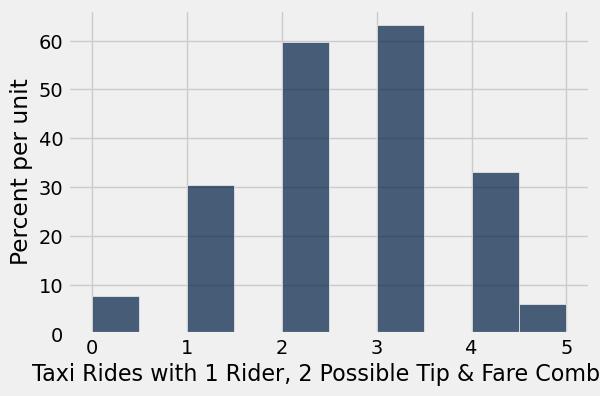

In [82]:
q42 = Table().with_column(
    'Taxi Rides with 1 Rider, 2 Possible Tip & Fare Combos',
    tens_or_fifteens).hist()

**Question 4.3** For what proportion of your simulated values from question 4.3, did all five taxi rides have fares were either 10 or more dollars in fare with at least a 10% tip percentage, or between 5-10 dollars in fare (not including 10 dollars), with at least a 15% tip percentage? Assign this value to `q43_prop`.

In [83]:
q43_prop = sum(tens_or_fifteens == 5) / len(tens_or_fifteens)
q43_prop

0.029999999999999999

**Question 5.** There are times when so many people are requesting rides that there aren’t enough cars on the road to help take them all. In these cases of very high demand, prices may increase. This system is called surge pricing. Does surge pricing impact the tips given for taxi rides? Conduct a hypothesis test at the 5% significance level to investigate the claim that there is a difference in the average percentage of the fare left as a tip depending on if there is surge pricing or not during the taxi ride. To receive full credit you should use A/B testing simulation methods as done in class and include all parts of the hypothesis test, including your hypotheses, a plot of the simulated values and observed value, p-value (assign this to `p_value`), and your conclusions. You should use a lower number of simulations (less than 1000) since this test may take some time to run if you do not.

*The null hypothesis is there is no difference in the means of the tips given depending on if the surge is applied or not. The alternative is that there is a difference. Our test statistic will be the difference of means.*

In [93]:
surge_means = TaxiNYC2.select('surge_applied', 'tip_percentage').group('surge_applied', np.mean)
observed = surge_means.column(1).item(1) - surge_means.column(1).item(0)

def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)  
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label') 

differences = make_array()

for i in np.arange(500):
    new_diff = one_simulated_difference(TaxiNYC2, 'tip_percentage', 'surge_applied')
    differences = np.append(differences, new_diff)
    


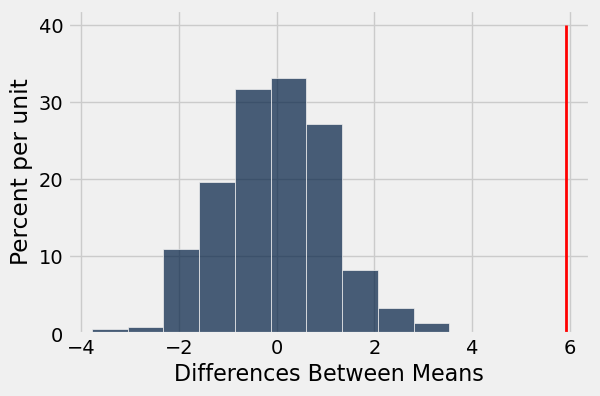

In [94]:
Table().with_column('Differences Between Means', differences).hist()
plots.plot([observed, observed], [0, .4], color = 'red', lw=2);

In [95]:
p_value = sum(differences >= observed) / 500
p_value

0.0

*The P-value is low, so we reject the null hypothesis. Therefore, there is a difference in mean tips given depending on the application of the surge.*

**Question 6.** Construct a 90% confidence interval for the proportion of taxi rides where a passenger is traveling alone. To receive full credit you should use bootstrapping methods as done in class, determine the upper and lower bounds of the confidence interval (assign these values to `upper_bound` and `lower_bound`), and a plot of the bootstrapped statistics and confidence interval.

In [64]:
sample_prop = one_pass.num_rows / TaxiNYC2.num_rows

sample_prop_array = make_array(sample_prop, 1 - sample_prop)

bootstrap_alone = make_array()

for i in np.arange(500):
    new_boot = sample_proportions(100, sample_prop_array).item(0) * 100
    bootstrap_alone = np.append(bootstrap_alone, new_boot)   


In [65]:
upper_bound = percentile(5, bootstrap_alone)
lower_bound = percentile(95, bootstrap_alone)

lower_bound, upper_bound

(89.0, 78.0)

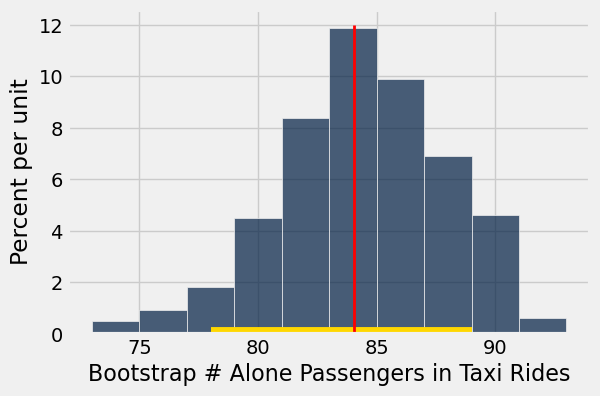

In [72]:
Table().with_column('Bootstrap # Alone Passengers in Taxi Rides', bootstrap_alone).hist()
plots.plot([lower_bound, upper_bound], [0,0], color = 'gold', lw=10);
plots.plot([sample_prop*100, sample_prop*100], [0, .12], color = 'red', lw=2);